Vous devrez travailler dans un premier temps avec le jeu de données issue de Kaggle pour réaliser vos apprentissage et l'évaluation de vos modèles.

Dans l'objectif d'enrichir notre prédictions nous souhaitons augmenter notre jeux de donneés. Vous devrez donc travailler dans un deuxième temps avec le jeux de données fournie, issue de data.world afin de :

comparer d'une part si les résultats de classification sur votre premier jeux de données sont similaire avec le second. Commentez.
Combiner les deux jeux données pour tenter d'améliorer vos résultats de prédiction.
Prédire les nouvelles émotions présente dans ce jeux de données sur les message du premier, et observer si les résultats sont pertinent.

In [45]:
#for machine Learning - classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# for visualization
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import plotly.express as px

#for NLP
import nltk
from nltk.stem import WordNetLemmatizer


In [46]:
# General stopwords & vectorizer
stopwords = nltk.corpus.stopwords.words('english')
vectorizer = CountVectorizer(stop_words = stopwords, ngram_range=(1,2))

In [47]:
# classification modals
logreg = LogisticRegression(max_iter=1000)
svclass = SVC()
svcL = LinearSVC()
sgdc = SGDClassifier (max_iter = 5000)
Knc = KNeighborsClassifier(n_neighbors = 10)
dtree = DecisionTreeClassifier (random_state =0)

In [48]:
# fit & predictions functions
def fit(X,y,mod):
    mod.fit(X,y)

def predict(X,mod):
    prediction = mod.predict(X)
    return prediction

In [49]:
#Kaggle Data import
datak = pd.read_csv("Emotion_final.csv")

# Classifications

In [50]:
#Datak Vectorization
x = np.array(datak["Text"])
y = np.array(datak["Emotion"])
x = vectorizer.fit_transform(x)
result = {}

In [51]:
#Conatenation of dataframe and re-building of the models
targets1 = list(datak["Emotion"].map({'anger':0, 'fear':1, 'happy':2, 'love':3, 'sadness':4, 'surprise':5}))
corpus1 = list(datak["Text"])

In [52]:
import plotly.express as px
fig = px.histogram(x=targets1, nbins=4).update_xaxes(categoryorder = 'total descending')
fig.update_layout( title="Histogramme des sentiments ",
    xaxis_title="Sentiments",
    yaxis_title="N_Fois")

In [9]:
# Data Exploration 
import plotly.express as px
px.histogram(datak,x="Emotion", color="Emotion", marginal="rug", hover_name="Text", histfunc="sum")

In [10]:
#Percentage of emotions
listEmotion = datak["Emotion"].unique()
listEmotionCat = datak["Emotion"].unique()
def percentage (l,sentiment) :
    i = 0
    sum = 0
    for i in range (len(l)):
        if l[i] == sentiment:
            sum += 1
    return round((sum/len(l))*100)

listE = []
sumE = 0
for i in range (len(listEmotion)):
    sumE = percentage(datak["Emotion"],listEmotionCat[i])

    listE.append(sumE)

fig = px.pie(values=listE, names=listEmotion, title='Pourcentage des Emotions')
fig.show()

In [11]:
px.sunburst(datak, path=["Emotion"],color="Emotion",hover_data=datak.columns)

In [114]:
go.Figure(data=[go.Pie(labels=df.emotion.unique(),
                             values=df.groupby('Emotion').content.nunique(), 
                             textinfo='label+percent',
                            )],
                             layout ={'title':'Proportion Emotion for World set','font_color':'grey'}

SyntaxError: unexpected EOF while parsing (<ipython-input-114-6e6758da39a0>, line 8)

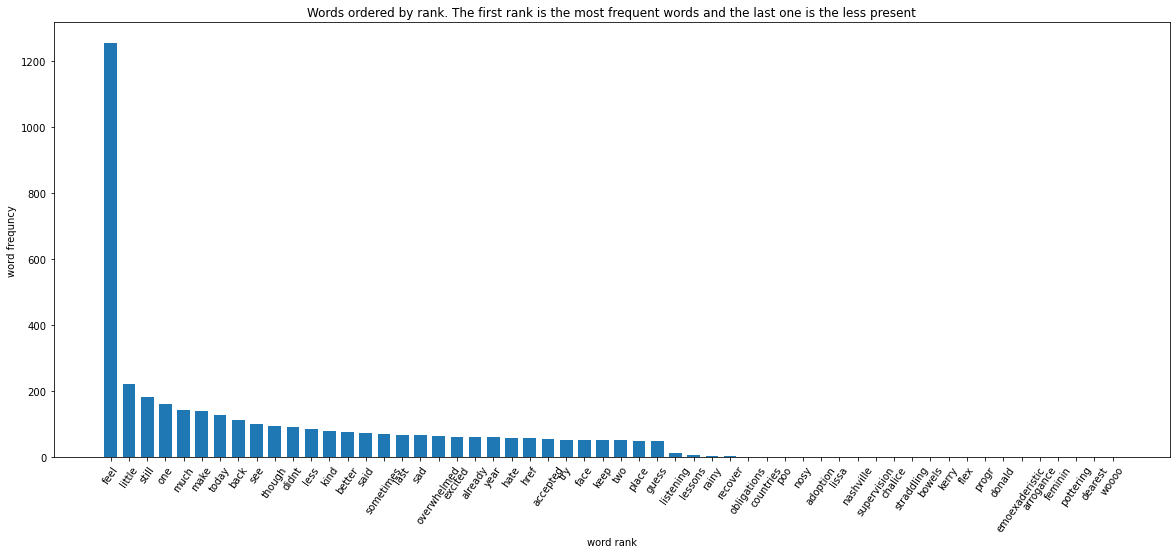

In [129]:
# Visualization : Graph Words ordered by rank
import matplotlib.pyplot as plt
import numpy as np
from django.db.models import Sum

targets = list(datak["Emotion"])
corpus = list(datak["Text"])

# Vobabulary analysis
vec = TfidfVectorizer(stop_words=stopwords)
X = vec.fit_transform(corpus)
words = vec.get_feature_names()


# Compute rank
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-5]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

# Sub-sample the data to plot.
# take the 20 first + the rest sample with the given step 
def subsample(x, step=150):
    return np.hstack((x[:30], x[30::step]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('word rank')
plt.ylabel('word frequncy')
plt.title("Words ordered by rank. The first rank is the most frequent words and the last one is the less present");

In [13]:
import plotly.express as px
fig = px.histogram(x=targets1, nbins=4).update_xaxes(categoryorder = 'total descending')
fig.update_layout( title="Histogramme des sentiments ",
    xaxis_title="Sentiments",
    yaxis_title="N_Fois")

In [14]:
#vizuaisation of top sentiments
fig = px.bar(datak[:90], x='Text', y='Emotion', title='Counts of top sentiments', template='plotly_white')
fig.show()

In [58]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

### Logistic Regression

In [59]:
# fit & predict
fit(x_train, y_train, logreg)
ypred = predict(x_test, logreg)
logreg_f1 = f1_score(y_test, ypred, average="weighted")
print(logreg_f1)
result['logreg_f1']= logreg_f1

0.8991977253696037


In [60]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, ypred) 
pre = metrics.precision_score(y_test,ypred,average ='macro', zero_division=0)
rec = metrics.recall_score(y_test,ypred, average ='macro', zero_division=0)

In [61]:
df = pd.DataFrame(columns=['model', 'F1_score', 'accuracy',  'precision', 'recall']) 
df = df.append({'model': 'logreg','F1_score':logreg_f1, 'accuracy': acc, 'precision':pre, 'recall': rec},ignore_index=True)
print(df)



    model  F1_score  accuracy  precision    recall
0  logreg  0.899198  0.900746   0.881424  0.842688


In [62]:
logreg_conusfion_matrix1 = confusion_matrix (y_test, ypred)
result['logreg_conusfion_matrix1']= logreg_conusfion_matrix1
print ('logreg_conusfion_matrix1 =', logreg_conusfion_matrix1)

logreg_conusfion_matrix1 = [[ 532   11   21    1   34    1]
 [  30  432   17    0   28   19]
 [   3    2 1333   38   18    5]
 [   2    3   62  251    7    0]
 [  20   12   27    3 1194    2]
 [   7   25   16    1   11  124]]


In [63]:
logreg_classification_report1= classification_report(y_test, ypred)
print ('logreg_conusfion_matrix1 =')
print(logreg_classification_report1)
result['logreg_classification_report1']= logreg_classification_report1

logreg_conusfion_matrix1 =
              precision    recall  f1-score   support

       anger       0.90      0.89      0.89       600
        fear       0.89      0.82      0.85       526
       happy       0.90      0.95      0.93      1399
        love       0.85      0.77      0.81       325
     sadness       0.92      0.95      0.94      1258
    surprise       0.82      0.67      0.74       184

    accuracy                           0.90      4292
   macro avg       0.88      0.84      0.86      4292
weighted avg       0.90      0.90      0.90      4292



### SVC

In [64]:
# fit & predict
fit(x_train, y_train, svclass)
ypred = predict(x_test, svclass)
svclass_f1 = f1_score(y_test, ypred, average="weighted")
svclass_confusion_matrix = confusion_matrix (y_test, ypred)
print('svclass_f1 =',svclass_f1, )



svclass_f1 = 0.7825518915306116


In [65]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, ypred) 
pre = metrics.precision_score(y_test,ypred,average ='macro', zero_division=0)
rec = metrics.recall_score(y_test,ypred, average ='macro', zero_division=0)

In [66]:
df = df.append({'model': 'SVC','F1_score':svclass_f1, 'accuracy': acc, 'precision':pre, 'recall': rec},ignore_index=True)


In [67]:
df.head()

model  F1_score  accuracy  precision    recall
0  logreg  0.899198  0.900746   0.881424  0.842688
1     SVC  0.782552  0.796831   0.866013  0.650460

In [68]:
svclass_conusfion_matrix1 = confusion_matrix (y_test, ypred)
result['svclass_conusfion_matrix1']= svclass_conusfion_matrix1
print ('svclass_conusfion_matrix1 =', svclass_conusfion_matrix1)

svclass_conusfion_matrix1 = [[ 378    9  108    1  104    0]
 [  14  324  118    0   70    0]
 [   4    4 1360    9   21    1]
 [   1    1  173  131   19    0]
 [  12   10   71    2 1161    2]
 [   2   30   52    0   34   66]]


In [69]:
svclass_classification_report1= classification_report(y_test, ypred)
result['svclass_classification_report1']= svclass_classification_report1
print ('svclass_classification_report1 =', svclass_classification_report1)

svclass_classification_report1 =               precision    recall  f1-score   support

       anger       0.92      0.63      0.75       600
        fear       0.86      0.62      0.72       526
       happy       0.72      0.97      0.83      1399
        love       0.92      0.40      0.56       325
     sadness       0.82      0.92      0.87      1258
    surprise       0.96      0.36      0.52       184

    accuracy                           0.80      4292
   macro avg       0.87      0.65      0.71      4292
weighted avg       0.82      0.80      0.78      4292



### SGDC

In [70]:
# fit & predict
fit(x_train, y_train, sgdc)
ypred = predict(x_test, sgdc)
sgdc_f1 = f1_score(y_test, ypred, average="weighted")
print(sgdc_f1)

result['sgdc_f1']= sgdc_f1

0.9057411871384986


In [71]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, ypred) 
pre = metrics.precision_score(y_test,ypred,average ='macro', zero_division=0)
rec = metrics.recall_score(y_test,ypred, average ='macro', zero_division=0)

In [72]:
df = df.append({'model': 'SGDC','F1_score':sgdc_f1, 'accuracy': acc, 'precision':pre, 'recall': rec},ignore_index=True)
df.head()


model  F1_score  accuracy  precision    recall
0  logreg  0.899198  0.900746   0.881424  0.842688
1     SVC  0.782552  0.796831   0.866013  0.650460
2    SGDC  0.905741  0.906570   0.883281  0.861322

### Knc

In [73]:
# fit & predict
fit(x_train, y_train, Knc)
ypred = predict(x_test, Knc)
Knc_f1 = f1_score(y_test, ypred, average="weighted")
print(Knc_f1)

result['Knc_f1']= Knc_f1

0.45736459471976015


In [74]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, ypred) 
pre = metrics.precision_score(y_test,ypred,average ='macro', zero_division=0)
rec = metrics.recall_score(y_test,ypred, average ='macro', zero_division=0)

In [75]:
df = df.append({'model':'Knc','F1_score':Knc_f1, 'accuracy': acc, 'precision':pre, 'recall': rec},ignore_index=True)
df.head()

model  F1_score  accuracy  precision    recall
0  logreg  0.899198  0.900746   0.881424  0.842688
1     SVC  0.782552  0.796831   0.866013  0.650460
2    SGDC  0.905741  0.906570   0.883281  0.861322
3     Knc  0.457365  0.466682   0.513817  0.356425

### dtree

In [76]:
# fit & predict
fit(x_train, y_train, dtree)
ypred = predict(x_test, dtree)
dtree_f1 = f1_score(y_test, ypred, average="weighted")
print(dtree_f1)

result['dtree_f1']= dtree_f1

0.8735854595419213


In [77]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, ypred) 
pre = metrics.precision_score(y_test,ypred,average ='macro', zero_division=0)
rec = metrics.recall_score(y_test,ypred, average ='macro', zero_division=0)

In [78]:
df = df.append({'model': 'dtree','F1_score':dtree_f1, 'accuracy': acc, 'precision':pre, 'recall': rec},ignore_index=True)
df.head()

model  F1_score  accuracy  precision    recall
0  logreg  0.899198  0.900746   0.881424  0.842688
1     SVC  0.782552  0.796831   0.866013  0.650460
2    SGDC  0.905741  0.906570   0.883281  0.861322
3     Knc  0.457365  0.466682   0.513817  0.356425
4   dtree  0.873585  0.873486   0.842071  0.843328

### Datak Analyse

In [79]:
df.to_csv('datak2.csv')

In [81]:
dfresult1 = pd.read_csv('datak2.csv')
dfresult1

Unnamed: 0   model  F1_score  accuracy  precision    recall
0           0  logreg  0.899198  0.900746   0.881424  0.842688
1           1     SVC  0.782552  0.796831   0.866013  0.650460
2           2    SGDC  0.905741  0.906570   0.883281  0.861322
3           3     Knc  0.457365  0.466682   0.513817  0.356425
4           4   dtree  0.873585  0.873486   0.842071  0.843328

In [82]:
import plotly.graph_objs as go
layout=go.Layout(title='Comparatif des classifieurs')
fig3 = go.Figure(layout=layout)
fig3.add_trace(go.Scatter(x=dfresult1.model, y=dfresult1.F1_score, name="F1_score",
                    line_shape='linear'))
fig3.add_trace(go.Scatter(x=dfresult1.model, y=dfresult1.accuracy, name="Accuracy",
                    line_shape='linear'))
fig3.add_trace(go.Scatter(x=dfresult1.model, y=dfresult1.precision, name="Precision",
                    line_shape='linear'))
fig3.add_trace(go.Scatter(x=dfresult1.model, y=dfresult1.recall, name="Recall",
                    line_shape='linear'))



fig3.show()

# Deuxième jeu de données

In [83]:
#Kaggle Data import
dataw = pd.read_csv("text_emotion.csv")

In [84]:
dataw.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...

In [85]:
px.sunburst(dataw, path=["sentiment"],color="sentiment",hover_data=dataw.columns)

In [86]:
#Dataw Vectorization
x2 = np.array(dataw["content"])
y2 = np.array(dataw["sentiment"])
x2 = vectorizer.fit_transform(x2)
result2 = {}

In [87]:
#split data
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.20, random_state=0)

### Logistic Regression

In [88]:
#  fit & predict
fit(x_train, y_train, logreg)
ypred = predict(x_test, logreg)
logreg2_f1 = f1_score(y_test, ypred, average="weighted")
print(logreg2_f1)

result2['logreg2_f1']= logreg2_f1

0.31147905978929985


In [89]:
from sklearn import metrics
acc2 = metrics.accuracy_score(y_test, ypred) 
pre2 = metrics.precision_score(y_test,ypred,average ='macro', zero_division=0)
rec2 = metrics.recall_score(y_test,ypred, average ='macro', zero_division=0)

In [90]:
df2 = pd.DataFrame(columns=['model', 'F1_score', 'accuracy',  'precision', 'recall']) 

In [91]:
df2 = df2.append({'model': 'logreg2','F1_score':logreg2_f1, 'accuracy': acc2, 'precision':pre2, 'recall': rec2},ignore_index=True)
df2.head()

model  F1_score  accuracy  precision    recall
0  logreg2  0.311479  0.340125   0.216416  0.173519

### SVC

In [92]:
# fit & predict
fit(x_train, y_train, svclass)
ypred = predict(x_test, svclass)
svclass2_f1 = f1_score(y_test, ypred, average="weighted")
print(svclass2_f1)

result2['svclass2_f1']= svclass2_f1

0.2914450841297394


In [93]:
from sklearn import metrics
acc2 = metrics.accuracy_score(y_test, ypred) 
pre2 = metrics.precision_score(y_test,ypred,average ='macro', zero_division=0)
rec2 = metrics.recall_score(y_test,ypred, average ='macro', zero_division=0)

In [94]:
df2 = df2.append({'model': 'SVC2','F1_score':svclass2_f1, 'accuracy': acc2, 'precision':pre2, 'recall': rec2},ignore_index=True)
df2.head()

model  F1_score  accuracy  precision    recall
0  logreg2  0.311479  0.340125   0.216416  0.173519
1     SVC2  0.291445  0.338250   0.220985  0.155820

### SGDC

In [95]:
# fit & predict
fit(x_train, y_train, sgdc)
ypred = predict(x_test, sgdc)
sgdc2_f1 = f1_score(y_test, ypred, average="weighted")
print(sgdc2_f1)

result2['sgdc2_f1']= sgdc2_f1

0.3045362653995193


In [96]:
from sklearn import metrics
acc2 = metrics.accuracy_score(y_test, ypred) 
pre2 = metrics.precision_score(y_test,ypred,average ='macro', zero_division=0)
rec2 = metrics.recall_score(y_test,ypred, average ='macro', zero_division=0)

In [97]:
df2 = df2.append({'model': 'SGDC2','F1_score':sgdc2_f1, 'accuracy': acc2, 'precision':pre2, 'recall': rec2},ignore_index=True)
df2.head()

model  F1_score  accuracy  precision    recall
0  logreg2  0.311479  0.340125   0.216416  0.173519
1     SVC2  0.291445  0.338250   0.220985  0.155820
2    SGDC2  0.304536  0.329125   0.194848  0.172215

### KNC

In [98]:
# fit & predict
fit(x_train, y_train, Knc)
ypred = predict(x_test, Knc)
Knc2_f1 = f1_score(y_test, ypred, average="weighted")
print(Knc2_f1)

result2['Knc2_f1']= Knc2_f1

0.16256087379422918


In [99]:
from sklearn import metrics
acc2 = metrics.accuracy_score(y_test, ypred) 
pre2 = metrics.precision_score(y_test,ypred,average ='macro', zero_division=0)
rec2 = metrics.recall_score(y_test,ypred, average ='macro', zero_division=0)

In [100]:
df2 = df2.append({'model': 'KNC2','F1_score':Knc2_f1, 'accuracy': acc2, 'precision':pre2, 'recall': rec2},ignore_index=True)
df2.head()

model  F1_score  accuracy  precision    recall
0  logreg2  0.311479  0.340125   0.216416  0.173519
1     SVC2  0.291445  0.338250   0.220985  0.155820
2    SGDC2  0.304536  0.329125   0.194848  0.172215
3     KNC2  0.162561  0.239250   0.141487  0.094472

### dtree

In [101]:
# fit & predict
fit(x_train, y_train, dtree)
ypred = predict(x_test, dtree)
dtree2_f1 = f1_score(y_test, ypred, average="weighted")
print(dtree2_f1)

result2['dtree2_f1']= dtree2_f1

0.275582832813995


In [102]:
from sklearn import metrics
acc2 = metrics.accuracy_score(y_test, ypred) 
pre2 = metrics.precision_score(y_test,ypred,average ='macro', zero_division=0)
rec2 = metrics.recall_score(y_test,ypred, average ='macro', zero_division=0)

In [103]:
df2 = df2.append({'model': 'dtree2','F1_score':dtree2_f1, 'accuracy': acc2, 'precision':pre2, 'recall': rec2},ignore_index=True)
df2.head()

model  F1_score  accuracy  precision    recall
0  logreg2  0.311479  0.340125   0.216416  0.173519
1     SVC2  0.291445  0.338250   0.220985  0.155820
2    SGDC2  0.304536  0.329125   0.194848  0.172215
3     KNC2  0.162561  0.239250   0.141487  0.094472
4   dtree2  0.275583  0.288750   0.174475  0.160242

### Dataw Analyse

In [104]:
df2.to_csv('dataw2.csv')

In [105]:
dfresult2 = pd.read_csv('dataw2.csv')
dfresult2

Unnamed: 0    model  F1_score  accuracy  precision    recall
0           0  logreg2  0.311479  0.340125   0.216416  0.173519
1           1     SVC2  0.291445  0.338250   0.220985  0.155820
2           2    SGDC2  0.304536  0.329125   0.194848  0.172215
3           3     KNC2  0.162561  0.239250   0.141487  0.094472
4           4   dtree2  0.275583  0.288750   0.174475  0.160242

In [106]:
import plotly.graph_objs as go
layout=go.Layout(title='Comparatif des classifieurs')
fig3 = go.Figure(layout=layout)
fig3.add_trace(go.Scatter(x=dfresult2.model, y=dfresult2.F1_score, name="F1_score",
                    line_shape='linear'))
fig3.add_trace(go.Scatter(x=dfresult2.model, y=dfresult2.accuracy, name="Accuracy",
                    line_shape='linear'))
fig3.add_trace(go.Scatter(x=dfresult2.model, y=dfresult2.precision, name="Precision",
                    line_shape='linear'))
fig3.add_trace(go.Scatter(x=dfresult2.model, y=dfresult2.recall, name="Recall",
                    line_shape='linear'))



fig3.show()

In [113]:
import plotly.graph_objects as go
import numpy as np

x= dfresult2['model']
y= dfresult2['F1_score']

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, name="linear",
                    line_shape='linear'))
fig.add_trace(go.Scatter(x=x, y=y + 5, name="spline",
                    text=["tweak line smoothness<br>with 'smoothing' in line object"],
                    hoverinfo='text+name',
                    line_shape='spline'))
fig.add_trace(go.Scatter(x=x, y=y + 10, name="vhv",
                    line_shape='vhv'))
fig.add_trace(go.Scatter(x=x, y=y + 15, name="hvh",
                    line_shape='hvh'))
fig.add_trace(go.Scatter(x=x, y=y + 20, name="vh",
                    line_shape='vh'))
fig.add_trace(go.Scatter(x=x, y=y + 25, name="hv",
                    line_shape='hv'))

fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))

fig.show()

### Two datasets combination / Prediction improvment

In [49]:
data=datak+dataw

In [51]:
data.shape

(40000, 6)

In [52]:
datak.shape

(21459, 2)

In [53]:
dataw.shape

(40000, 4)

In [71]:
#Conatenation of dataframe and re-building of the models
targets1 = datak["Emotion"].map({'anger':0, 'fear':1, 'happy':2, 'love':3, 'sadness':4, 'surprise':5})
corpus1 = datak["Text"]

targets2 = dataw["sentiment"].map({'anger':0, 'worry':1, 'happiness':2, 'love':3, 'sadness':4, 'surprise':5,'neutral':6, 'fun':7, 'relief':8, 'hate': 9, 'empty':10, 'enthusiasm':11, 'boredom': 12 })
corpus2 = dataw["content"]

corpus = corpus1+corpus2
targets = targets1+targets2

In [73]:
corpus.head()

0    i didnt feel humiliated@tiffanylue i know  i w...
1    i can go from feeling so hopeless to so damned...
2    im grabbing a minute to post i feel greedy wro...
3    i am ever feeling nostalgic about the fireplac...
4    i am feeling grouchy@dannycastillo We want to ...
dtype: object

In [74]:
corpus.shape

(40000,)

In [76]:
targets.shape

(40000,)

In [75]:
print(targets)# je dois retraiter les données

0        14.0
1         8.0
2         4.0
3        14.0
4         6.0
         ... 
39995     NaN
39996     NaN
39997     NaN
39998     NaN
39999     NaN
Length: 40000, dtype: float64


#Combiner les deux jeux données pour tenter d'améliorer vos résultats de prédiction.
#Prédire les nouvelles émotions présente dans ce jeux de données sur les message du premier, et observer si les résultats sont pertinents.


In [95]:
from sklearn.pipeline import Pipeline
targets = list(datak["Emotion"].map({'anger':0, 'fear':1, 'happy':2, 'love':3, 'sadness':4, 'surprise':5}))
corpus = list(datak["Text"])

X = corpus
y = targets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

pipe1 = Pipeline([('vect', CountVectorizer(stop_words = stopwords)), ('sgd', SGDClassifier()),])
pipe1.fit(X_train, y_train)
y_pred =pipe1.predict(X_test)


# pick a string and test it 
labels = ['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']
ltext = []
def get_text():
  while True:
    text = input("Pick a text: ")
    if isinstance(text, str) :
        return text
    else:
      print("Try again...")

text = get_text()
ltext.append(text)
y_pred =pipe1.predict(ltext)
print(labels[y_pred[0]])

Pick a text: I m happy !
happy
